## Roots of unity

In [1]:
import numpy as np
import math
import pylatexenc

### Recall : For equation $a ^ b = c$
- Power function : $a ^ b = y \rightarrow y = a ^ b$
- Logarithm funciton : $a^y = c \rightarrow y = log_a c$
- Root funciton : $y ^ b = c \rightarrow y = c^\frac{1}{b}$

### For natural number

$z^n = 1$

In [2]:
## if N = 1
## z = 1
## if N = 2
z = math.sqrt(2)
print(z)

1.4142135623730951


### For Complexity Number

$\omega_0 = \exp(\frac{0 \times 2\pi}{3}i) = 1$

$\omega_1 = \exp(\frac{1 \times 2\pi}{3}i) = \cos(\frac{2\pi}{3})+i \sin(\frac{2\pi}{3}) = -\frac{1}{2} + i \frac{\sqrt{3}}{2} $

$\omega_2 = \exp(\frac{2 \times 2\pi}{3}i) = \cos(\frac{4\pi}{3})+i \sin(\frac{4\pi}{3}) = -\frac{1}{2} - i \frac{\sqrt{3}}{2} $

and

$\omega_1^2 = \omega_2$ 
$\omega_1^3 = 1$ 
$\omega_2^2 = \omega_1$ 
$\omega_2^3 = 1$ 

$ \omega = e ^ { \frac{2 \pi i}{N}}$

$1 = \omega \bar{\omega} = \omega \omega^{-1}$

$\bar{\omega_k} = \omega_k^{-1} = e ^ { -\frac{2 \pi k i}{N}}$

## Definition

${QFT}_n: | \varphi \rangle = \sum_{j=0}^{N-1} a_j|j\rangle_n \rightarrow \sum_{j=0}^{N-1} b_j|j\rangle_n$

$QFT_1 = H$

$QFT_n = H^{\times n}$ ???

In [3]:
from qiskit import QuantumCircuit

### $QFT_1$

In [4]:
qc_1 = QuantumCircuit(1,1)

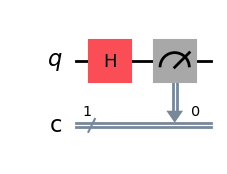

In [5]:
qc_1.h(0)
qc_1.measure(0,0)
qc_1.draw(output='mpl')

## $QFT_2$

In [6]:
from qiskit.circuit.library import CRZGate

In [7]:
qc_2 = QuantumCircuit(2,2)

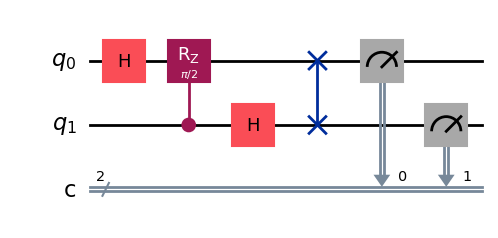

In [8]:
qc_2.h(0)
qc_2.crz(math.pi/2, 1,0)
qc_2.h(1)
qc_2.swap(0,1)
qc_2.measure(0,0)
qc_2.measure(1,1)
qc_2.draw(output='mpl')

## $QFT_3$

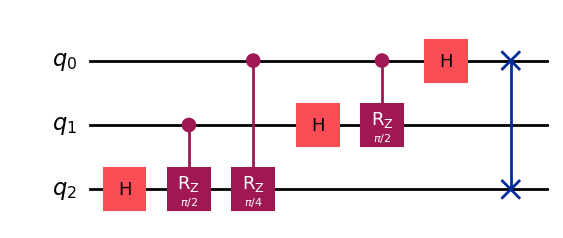

In [ ]:
def apply_cr_rot(qc, control, target, k):
    theta = 2 * math.pi / (2 ** k)
    qc.crz(theta, control, target)

def qft_3():
    qc = QuantumCircuit(3)

    qc.h(2)
    apply_cr_rot(qc, 1, 2, 2)
    apply_cr_rot(qc, 0, 2, 3)

    # Qubit 1
    qc.h(1)
    apply_cr_rot(qc, 0, 1, 2)

    # Qubit 0
    qc.h(0)

    # SWAP
    qc.swap(0, 2)

    return qc

qc_3 = qft_3()
qc_3.draw('mpl')

## $QFT_4$

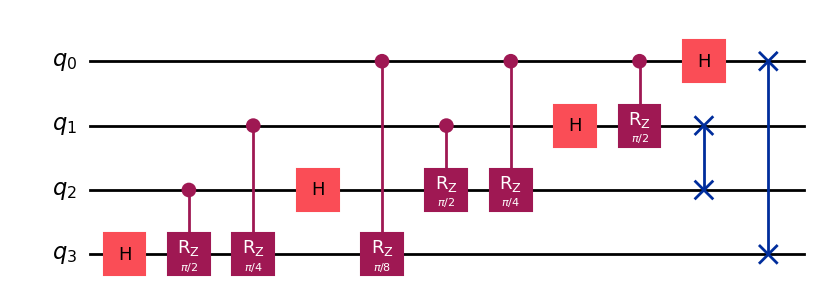

In [ ]:
def qft_4():
    qc = QuantumCircuit(4)

    qc.h(3)
    apply_cr_rot(qc, 2, 3, 2)
    apply_cr_rot(qc, 1, 3, 3)
    apply_cr_rot(qc, 0, 3, 4)

    qc.h(2)
    apply_cr_rot(qc, 1, 2, 2)
    apply_cr_rot(qc, 0, 2, 3)

    qc.h(1)
    apply_cr_rot(qc, 0, 1, 2)

    qc.h(0)

    qc.swap(0, 3)
    qc.swap(1, 2)

    return qc

# 构建电路
qc = qft_4()
qc.draw('mpl')

## For $QFT_n$

In [11]:
def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n - 1, -1, -1):
        qc.h(i)
        for j in range(i - 1, -1, -1):
            k = i - j + 1
            apply_cr_rot(qc, j, i, k)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    return qc

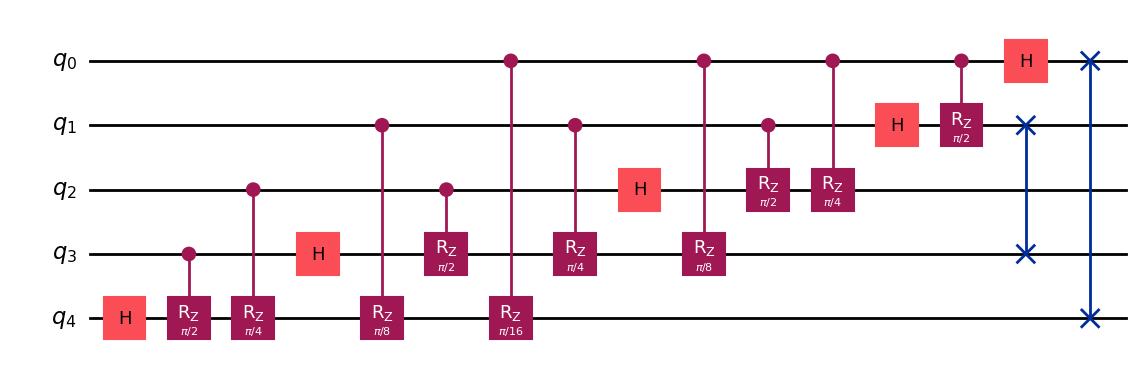

In [13]:
qc_5 = qft(5)
qc_5.draw("mpl")


## Inverse Quantum Fourier Transform

In [16]:
def apply_cr_rot_inv(qc, control, target, k):
    theta = -2 * math.pi / (2 ** k)
    qc.crz(theta, control, target)

def inverse_qft(n):
    qc = QuantumCircuit(n)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    for i in range(n):
        for j in range(i):
            k = i - j + 1
            apply_cr_rot_inv(qc, j, i, k)
        qc.h(i)
    return qc

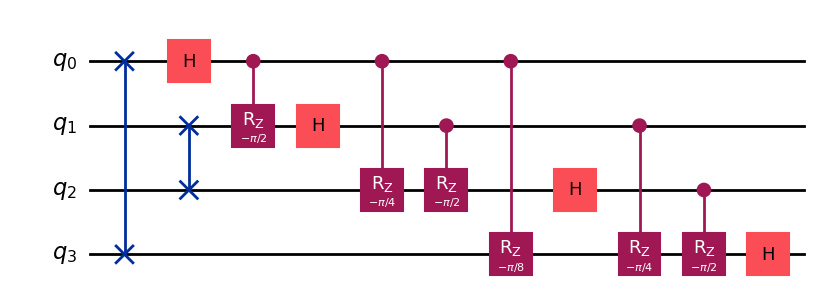

In [17]:
qc_inverse = inverse_qft(4)
qc_inverse.draw('mpl')